## 개요
위도, 경도 등 좌표 정보가 포함된 CSV 파일을 Point 공간데이터로 만들어 봅시다  

---

## 사용할 패키지 준비

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

## 사용할 데이터 준비
공공데이터포털의 "전국도서관표준데이터"를 활용합니다 

In [2]:
csv_path = 'https://www.data.go.kr/download/15013109/standard.do?dataType=csv'
lib_df = pd.read_csv(csv_path, encoding='cp949')
lib_df.info()
lib_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   도서관명        3495 non-null   object 
 1   시도명         3495 non-null   object 
 2   시군구명        3495 non-null   object 
 3   도서관유형       3495 non-null   object 
 4   휴관일         3495 non-null   object 
 5   평일운영시작시각    3495 non-null   object 
 6   평일운영종료시각    3495 non-null   object 
 7   토요일운영시작시각   3495 non-null   object 
 8   토요일운영종료시각   3495 non-null   object 
 9   공휴일운영시작시각   3495 non-null   object 
 10  공휴일운영종료시각   3495 non-null   object 
 11  열람좌석수       3495 non-null   int64  
 12  자료수(도서)     3495 non-null   int64  
 13  자료수(연속간행물)  3495 non-null   int64  
 14  자료수(비도서)    3495 non-null   int64  
 15  대출가능권수      3495 non-null   int64  
 16  대출가능일수      3495 non-null   int64  
 17  소재지도로명주소    3494 non-null   object 
 18  운영기관명       2868 non-null   object 
 19  도서관전화번호     3295 non-null  

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,운영기관명,도서관전화번호,부지면적,건물면적,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,강촌공원작은도서관,경기도,고양시,작은도서관,월+일+둘째 주 화+법정공휴일,10:00,19:00,10:00,19:00,00:00,...,책과도서관,031-901-6957,21.0,21.0,https://band.us/@kangchonlib,37.653332,126.781081,2022-03-31,3940000,경기도 고양시
1,고양윤창작은도서관,경기도,고양시,작은도서관,일+첫째 주 월+첫째 주 토+셋째 주 토+다섯째 주 토+법정공휴일,09:30,17:30,09:30,14:00,00:00,...,경기도 고양시 고양동 윤창아파트 입주자대표회의,031-967-9633,110.0,110.0,https://cafe.naver.com/yclibrary,37.705803,126.894709,2022-03-31,3940000,경기도 고양시
2,고양작은도서관,경기도,고양시,작은도서관,둘째 주 월+일+법정공휴일,09:00,18:00,10:00,18:00,00:00,...,경기도 고양시 고양동 주민자치위원회,031-963-4321,172.0,172.0,https://cafe.naver.com/gylibrary,37.702518,126.901195,2022-03-31,3940000,경기도 고양시
3,관산작은도서관,경기도,고양시,작은도서관,셋째 주 월+토+일+법정공휴일,09:00,18:00,00:00,00:00,00:00,...,경기도 고양시 관산동 주민자치위원회,031-962-1969,198.0,198.0,https://cafe.daum.net/glibrary,37.688013,126.862536,2022-03-31,3940000,경기도 고양시
4,내유작은도서관,경기도,고양시,작은도서관,토+일+법정공휴일,09:00,18:00,00:00,00:00,00:00,...,내유동복합커뮤니티,070-4422-2580,145.0,145.0,https://band.us/@naeyu,37.731293,126.848394,2022-03-31,3940000,경기도 고양시


테스트용이므로, 시군구명이 "남양주시"에 해당하는 데이터만 추출해보겠습니다. 

In [3]:
lib_df2 = lib_df[  lib_df.시군구명 == '남양주시'  ]
lib_df2.head()

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,운영기관명,도서관전화번호,부지면적,건물면적,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
3401,정약용도서관,경기도,남양주시,공공도서관,"매주 월요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,18:00,09:00,...,경기도 남양주시청,031-590-2587,21501.0,12807.0,http://lib.nyj.go.kr/jyy,37.612158,127.167357,2022-03-01,3990000,경기도 남양주시
3402,와부도서관,경기도,남양주시,공공도서관,"매주 금요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-8920,3920.0,4010.0,http://lib.nyj.go.kr/waboo,37.585685,127.217498,2022-03-01,3990000,경기도 남양주시
3403,화도도서관,경기도,남양주시,공공도서관,"매주 금요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-4587,596.0,2667.0,http://lib.nyj.go.kr/hwado,37.650137,127.305815,2022-03-01,3990000,경기도 남양주시
3404,진건도서관,경기도,남양주시,공공도서관,"매주 금요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-8260,1322.0,2848.0,http://lib.nyj.go.kr/jingeon,37.655136,127.177439,2022-03-01,3990000,경기도 남양주시
3405,평내도서관,경기도,남양주시,공공도서관,"매주 월요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,경기도 남양주시청,031-590-8560,3172.0,6307.0,http://lib.nyj.go.kr/pynae,37.641743,127.238890,2022-03-01,3990000,경기도 남양주시


### 좌표 속성 정보가 포함되어 있는가요?   
### 있다면, 위도, 경도 항목을 이용하여 Point Geometry를 만들 수 있습니다. 

In [4]:
# 좌표 항목을 가지고 지오메트리 데이터를 생성
geom = gpd.points_from_xy(lib_df2.경도, lib_df2.위도)

### geom 객체 정보가 무엇인지 궁금하신가요? 궁금하면?

In [5]:
geom[0:4]

<GeometryArray>
Length: 4, dtype: geometry

## geom 도형 객체와 데이터프레임의 속성정보를 붙여서 GeoDataFrame을 만들 수 있습니다. 

In [6]:
# 지오메트리를 붙인 공간데이터프레임 생성 
lib_gdf = gpd.GeoDataFrame(lib_df2, geometry=geom, crs="epsg:4326")
lib_gdf.info()
lib_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13 entries, 3401 to 3413
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   도서관명        13 non-null     object  
 1   시도명         13 non-null     object  
 2   시군구명        13 non-null     object  
 3   도서관유형       13 non-null     object  
 4   휴관일         13 non-null     object  
 5   평일운영시작시각    13 non-null     object  
 6   평일운영종료시각    13 non-null     object  
 7   토요일운영시작시각   13 non-null     object  
 8   토요일운영종료시각   13 non-null     object  
 9   공휴일운영시작시각   13 non-null     object  
 10  공휴일운영종료시각   13 non-null     object  
 11  열람좌석수       13 non-null     int64   
 12  자료수(도서)     13 non-null     int64   
 13  자료수(연속간행물)  13 non-null     int64   
 14  자료수(비도서)    13 non-null     int64   
 15  대출가능권수      13 non-null     int64   
 16  대출가능일수      13 non-null     int64   
 17  소재지도로명주소    13 non-null     object  
 18  운영기관명       13 non-null     object  
 1

,도서관명,시도명,시군구명,도서관유형,휴관일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,공휴일운영시작시각,...,도서관전화번호,부지면적,건물면적,홈페이지주소,위도,경도,데이터기준일자,제공기관코드,제공기관명,geometry
3401,정약용도서관,경기도,남양주시,공공도서관,"매주 월요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,18:00,09:00,...,031-590-2587,21501.0,12807.0,http://lib.nyj.go.kr/jyy,37.612158,127.167357,2022-03-01,3990000,경기도 남양주시,POINT (127.16736 37.61216)
3402,와부도서관,경기도,남양주시,공공도서관,"매주 금요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,031-590-8920,3920.0,4010.0,http://lib.nyj.go.kr/waboo,37.585685,127.217498,2022-03-01,3990000,경기도 남양주시,POINT (127.21750 37.58569)
3403,화도도서관,경기도,남양주시,공공도서관,"매주 금요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,031-590-4587,596.0,2667.0,http://lib.nyj.go.kr/hwado,37.650137,127.305815,2022-03-01,3990000,경기도 남양주시,POINT (127.30581 37.65014)
3404,진건도서관,경기도,남양주시,공공도서관,"매주 금요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,031-590-8260,1322.0,2848.0,http://lib.nyj.go.kr/jingeon,37.655136,127.177439,2022-03-01,3990000,경기도 남양주시,POINT (127.17744 37.65514)
3405,평내도서관,경기도,남양주시,공공도서관,"매주 월요일, 1월 1일, 설날·추석 연휴(대체공휴일 포함)",09:00,22:00,09:00,22:00,09:00,...,031-590-8560,3172.0,6307.0,http://lib.nyj.go.kr/pynae,37.641743,127.238890,2022-03-01,3990000,경기도 남양주시,POINT (127.23889 37.64174)


#### 항목이 너무 많고, 한글이어서 데이터 가공/관리가 좀 불편합니다   
#### 먼저 필요한 항목만 추출해보겠습니다

In [7]:
lib_gdf2 = lib_gdf[['도서관명', '도서관유형', '열람좌석수', '건물면적', 'geometry']]
lib_gdf2.head()

,도서관명,도서관유형,열람좌석수,건물면적,geometry
3401,정약용도서관,공공도서관,560,12807.0,POINT (127.16736 37.61216)
3402,와부도서관,공공도서관,430,4010.0,POINT (127.21750 37.58569)
3403,화도도서관,공공도서관,328,2667.0,POINT (127.30581 37.65014)
3404,진건도서관,공공도서관,393,2848.0,POINT (127.17744 37.65514)
3405,평내도서관,공공도서관,454,6307.0,POINT (127.23889 37.64174)


#### 항목명을 변경할 수 있습니다

In [8]:
lib_gdf2.columns = ['name', 'type', 'chair_cnt', 'bd_area', 'geometry']
lib_gdf2.head()

,name,type,chair_cnt,bd_area,geometry
3401,정약용도서관,공공도서관,560,12807.0,POINT (127.16736 37.61216)
3402,와부도서관,공공도서관,430,4010.0,POINT (127.21750 37.58569)
3403,화도도서관,공공도서관,328,2667.0,POINT (127.30581 37.65014)
3404,진건도서관,공공도서관,393,2848.0,POINT (127.17744 37.65514)
3405,평내도서관,공공도서관,454,6307.0,POINT (127.23889 37.64174)


특정 항목(컬럼)만 이름을 바꿀 때에는 아래와 같이 해주면 됩니다.   
lib_gdf2.rename(columns = {'name' : 'lib_nm'}, inplace = True) 

---

<AxesSubplot: >

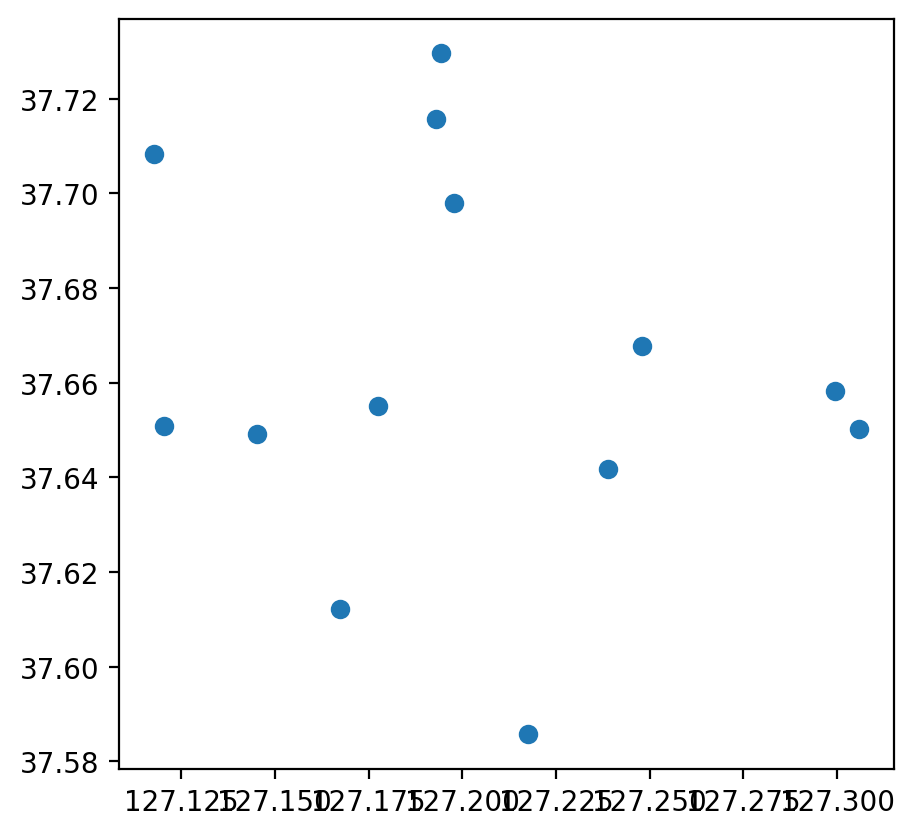

In [9]:
lib_gdf2.plot(figsize=(5,5))

In [11]:
lib_gdf2.explore()
# 에러가 발생하는 경우, 해결하려면 어떻게 할까요? 

## 만들어진 GeoDataFrame을 file로 저장하려면?

In [12]:
# SHP 저장
lib_gdf2.to_file('data/shp/library_pt4326.shp', encoding='cp949')

### geopandas.GeoDataFrame.to_file      
https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html  

### GDAL 지원 Vector format    
https://gdal.org/drivers/vector/index.html  

### 수고 많으셨습니다!!! 